## 1.실습과제 다중회귀분석 LR

In [2]:
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from statsmodels.api import qqplot, add_constant

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

[f.name for f in mpl.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
# p.46

df_raw = pd.read_csv('./datasets/concrete.csv',encoding='euc-kr')
display(df_raw.head())
display(df_raw.info())

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


None

In [3]:
# # 결측치 처리
# print(df_raw.isnull().sum())

# df_raw[['WEIGHT', 'WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand = True)
# df_raw[['HEIGHT', 'HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand = True)
# df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
# df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')
# df_raw['WEIGHT'] = df_raw['WEIGHT'] * 0.45
# df_raw['HEIGHT'] = df_raw['HEIGHT'] * 0.0254
# df_raw['BMI'] = df_raw['WEIGHT'] / (df_raw['HEIGHT']**2)
# df_raw.head()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
GENDER     0
dtype: int64


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER,WEIGHT_UNIT,HEIGHT_UNIT,BMI
0,35.2,46,163.4175,1.83515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성,lb,inch,48.523870
1,11.8,27,75.6000,1.80975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성,lb,inch,23.082595
2,22.2,69,79.9875,1.73990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성,lb,inch,26.422478
3,10.6,57,66.4875,1.67005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성,lb,inch,23.838617
4,47.5,51,98.5500,1.62560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성,lb,inch,37.293165


* label encording

In [4]:
# from sklearn.preprocessing import LabelEncoder
# # 카테고리 데이터
# colors = ["Red", "Green", "Blue", "Green", "Red"]
# # LabelEncoder 객체 생성
# encoder = LabelEncoder()
# # 데이터를 인코딩하여 변환
# encoded_colors = encoder.fit_transform(colors)
# print(encoded_colors)  # 출력: [2 1 0 1 2]

In [5]:
# df_raw = df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'], axis = 1)

# df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
# df_raw_dummy.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI,GENDER_여성
0,35.2,46,163.4175,1.83515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870,0
1,11.8,27,75.6000,1.80975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595,0
2,22.2,69,79.9875,1.73990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478,0
3,10.6,57,66.4875,1.67005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617,1
4,47.5,51,98.5500,1.62560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165,1


C:\Users\winju\Anaconda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


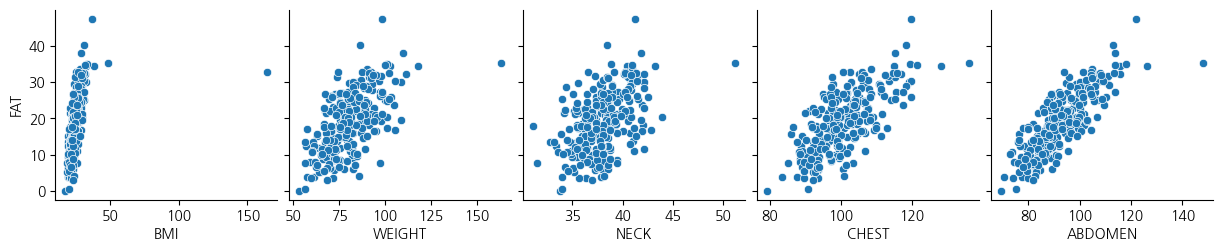

In [6]:
# p.48

sns.pairplot(df_raw_dummy, y_vars="FAT", x_vars = ['BMI',"WEIGHT", "NECK", "CHEST", "ABDOMEN"])

- 목표변수(fat)와 다수 설명변수간의 선형관계 확인
- 산점도에서 이상치 확인

In [7]:
df_raw_dummy.sort_values(by='BMI', ascending=False, inplace=True)
df_raw_dummy.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI,GENDER_여성
78,32.9,44,92.2500,0.74930,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,164.306562,1
0,35.2,46,163.4175,1.83515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870,0
82,34.5,45,118.2375,1.74625,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,38.774160,0
4,47.5,51,98.5500,1.62560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165,1
117,35.0,65,101.0250,1.73355,38.8,119.6,118.0,114.3,61.3,42.1,23.4,34.9,30.1,19.4,33.616780,0


In [8]:
df_raw_dummy.drop(78, inplace=True)

In [9]:
df_raw_dummy.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI,GENDER_여성
0,35.2,46,163.4175,1.83515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870,0
82,34.5,45,118.2375,1.74625,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,38.774160,0
4,47.5,51,98.5500,1.62560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165,1
117,35.0,65,101.0250,1.73355,38.8,119.6,118.0,114.3,61.3,42.1,23.4,34.9,30.1,19.4,33.616780,0
31,34.3,35,102.7125,1.76530,40.4,114.9,115.9,111.9,74.4,40.6,24.0,36.1,31.8,18.8,32.959928,1


- 78행의 BMI 값이 이상치로 판별되어 삭제함

C:\Users\winju\Anaconda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


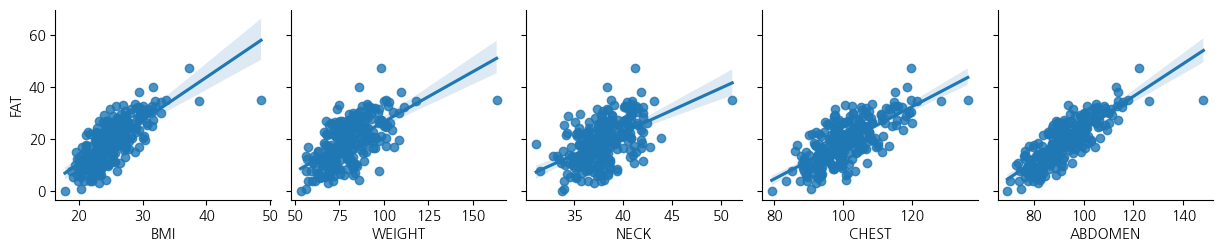

In [10]:
# p.48

sns.pairplot(df_raw_dummy, y_vars="FAT", x_vars = ['BMI',"WEIGHT", "NECK", "CHEST", "ABDOMEN"], kind="reg")

- 회귀직선을 그려봤을때 이상치의 영향을 받음
- 이상치 처리 검토 및 적절한 설명변수 선택 필요

In [11]:
# p.49

#sns.pairplot(df_raw_dummy)

- 목표변수와 선형관계가 있는 설명변수 확인
- 설명변수간 선형관계 확인 (weight, neck 등)
- 설명변수 간 다중공선성 처리 필요

In [12]:
df_raw_dummy.corr().round(3).head(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI,GENDER_여성
FAT,1.000,0.294,0.611,-0.023,0.497,0.703,0.813,0.620,0.554,0.503,0.265,0.493,0.363,0.355,0.725,-0.041
AGE,0.294,1.000,-0.013,-0.245,0.113,0.177,0.231,-0.050,-0.201,0.018,-0.105,-0.041,-0.085,0.214,0.115,-0.063
WEIGHT,0.611,-0.013,1.000,0.489,0.835,0.894,0.888,0.944,0.870,0.853,0.614,0.800,0.631,0.735,0.888,-0.013


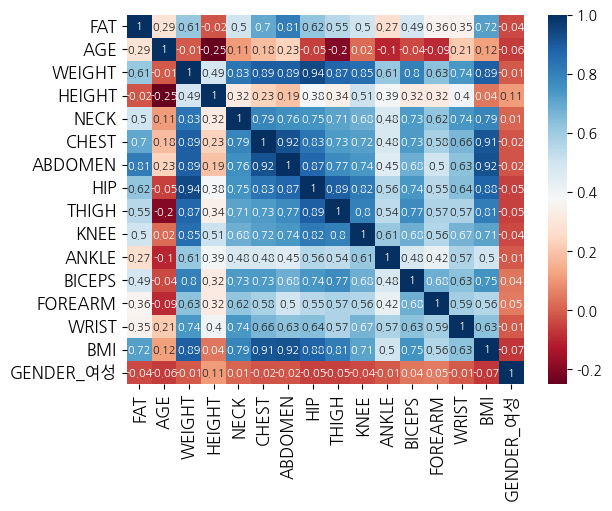

In [13]:
sns.heatmap(df_raw_dummy.corr().round(2),
            annot= True, annot_kws= {'size':8},
            cmap= 'RdBu')
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

- 체질 비만도(Fat) 와 가슴둘레(Chest), 복부 둘레(ABDOMEN), BMI 간의 높은 선형관계 확인
- 설명변수 상관관계 : 다수 설명변수 간의 선형관계 확인 -> 다중공선성 확인 및 처리 필요

In [31]:
# p.51

df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (721, 9)
test data size : (309, 9)


In [30]:
# p.46

df_raw = pd.read_csv('./datasets/concrete.csv',encoding='euc-kr')
display(df_raw.head())
display(df_raw.info())

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


None

In [32]:
# p.51

reg_model = smf.ols(formula = "strength ~ cement + blast_furnace_slag + fly_ash + water + superplasticizer + coarse_aggregate + fine_aggregate + age", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     144.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          9.94e-144
Time:                        09:51:41   Log-Likelihood:                -2714.7
No. Observations:                 721   AIC:                             5447.
Df Residuals:                     712   BIC:                             5489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -55.7671     34

- 1. 분석자료 수(No.OBservations) 는 150개
- 2. 잔차 자유도(Df Residuals) 는 134
- 3. 모델 자유도(DF Model) 는 15
- 4. 분석분석 결과 p-value 가 1.96e-36 으로 유의수준 0.05 에서 유의함
- 5. 수정된 설명력 : 0.753 으로 모델을 75% 설명가능함
- 6. 회귀계수 검정 : NECK, ABDOMEN 의 회귀계수가 p-value가 유의수준 0.05 에서 유의함

In [34]:
#p.53
#"strength ~ cement + blast_furnace_slag + fly_ash + water + superplasticizer + coarse_aggregate + fine_aggregate + age"
df_train_x = df_train.drop("strength", axis = 1)

df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values,i) for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
8,age,1.12
5,superplasticizer,3.08
6,coarse_aggregate,5.34
3,fly_ash,6.60
4,water,7.80
7,fine_aggregate,7.94
2,blast_furnace_slag,7.97
1,cement,8.08
0,const,7550.34


- WEIGHT, BMI, HEIGHT의 VIF가 매우 높고 HIP, ABDOMEN도 14.98로 높게 나타남
- 변수 특성, 영향을 고려하여 모델에서 WEIGHT, HEIGHT 제외 검토

In [33]:
reg_model = smf.ols(formula = "strength ~ cement + blast_furnace_slag + fly_ash + water + superplasticizer + coarse_aggregate + fine_aggregate + age", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     144.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          9.94e-144
Time:                        09:52:17   Log-Likelihood:                -2714.7
No. Observations:                 721   AIC:                             5447.
Df Residuals:                     712   BIC:                             5489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -55.7671     34

In [18]:
df_train_x = df_train.drop(["FAT",'HEIGHT','ABDOMEN','WEIGHT',"ANKLE",'BICEPS','KNEE','WRIST','HIP'], axis = 1)

df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif["Variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values,i) for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

,Variable,VIF
7,GENDER_여성,1.02
1,AGE,1.40
5,FOREARM,1.70
2,NECK,3.41
4,THIGH,4.33
3,CHEST,7.42
6,BMI,8.64
0,const,509.51


- WEIGHT, HEIGHT, HIP, ABDOMEN, KNEE 가 다중공선성이 존재하고
- 변수 특성, 영향을 고려하여 모델에서 제거

In [19]:
reg_model = smf.ols(formula = "FAT ~ BMI + CHEST + NECK + AGE", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     58.71
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.19e-29
Time:                        09:36:11   Log-Likelihood:                -463.71
No. Observations:                 150   AIC:                             937.4
Df Residuals:                     145   BIC:                             952.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.8799      8.995     -1.321      0.1

- 1. 분석자료 수(No.OBservations) 는 150개
- 2. 잔차 자유도(Df Residuals) 는 145
- 3. 모델 자유도(DF Model) 는 4
- 4. 분석분석 결과 p-value 가 2.19e-29 으로 유의수준 0.05 에서 유의함
- 5. 수정된 설명력 : 0.608 으로 모델을 60.8% 설명가능함
- 6. 회귀계수 검정 : BMI, CHEST, NECK, AGE 의 회귀계수가 p-value가 유의수준 0.05 에서 유의함

In [35]:
# 회귀 모델 생성 : 설명변수 간의 다중공선성 재확인

#설명변수간 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train[["cement", "blast_furnace_slag" , "fly_ash" , "water" , "superplasticizer" , "coarse_aggregate" , "fine_aggregate", "age"]]
# statsmodels의 상수항 추가 적용
df_train_x_const = add_constant(df_train_x)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["Variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values,i) for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,Variable,VIF
8,age,1.12
5,superplasticizer,3.08
6,coarse_aggregate,5.34
3,fly_ash,6.60
4,water,7.80
7,fine_aggregate,7.94
2,blast_furnace_slag,7.97
1,cement,8.08
0,const,7550.34


- VIF 가 10 미만이므로 다중공선성 해결

## 등분산성 검정 p.58

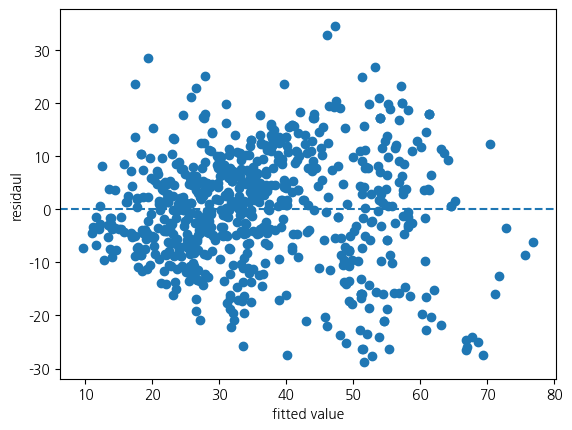

In [36]:
# 잔차 산점도 : x-예측값, y-잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residaul")
plt.axhline(y=0, linestyle="--")

* 잔차가 y=0 을 기준으로 random 하게 산포되어 있으므로 등분산성을 만족함

## 정규성 검정 p.58

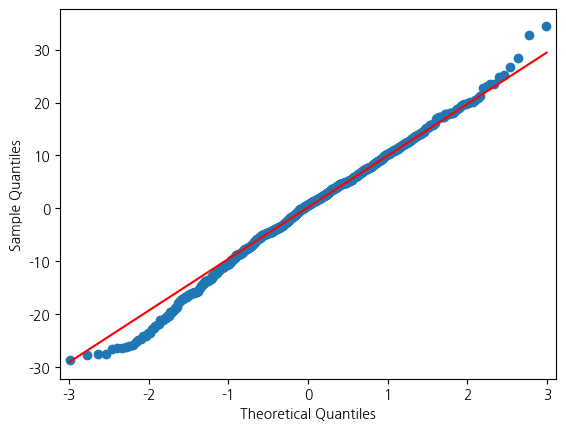

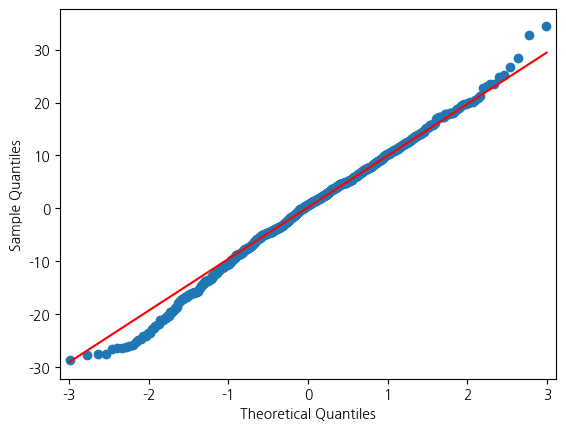

In [37]:
# 잔차 정규성 Q-Q plot
qqplot(reg_result.resid, line = "q")

* 정규분포 직선(적색 선)을 중심으로 분포하므로 정규분포를 따름

## 독립성 검정 p.59

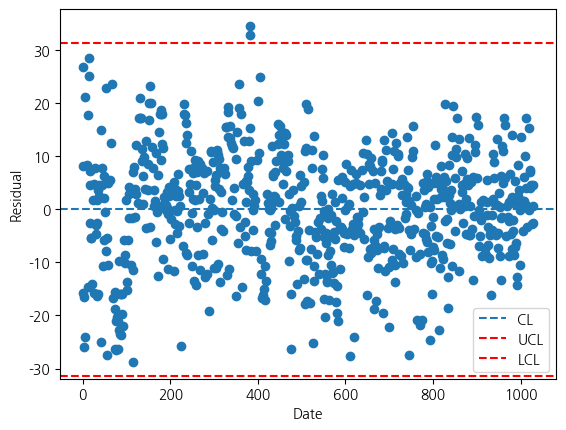

In [38]:
# 잔차의 독립성 확인
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Date") ; plt.ylabel("Residual")
plt.axhline(y = 0, linestyle = "--", label = "CL")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--", color = "red", label = "UCL")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "dashed", color = "red", label = "LCL")
plt.legend()

* 잔차가 y=0 을 기준으로 관리상하한을 벗어나지 않고 random하게 산포되어 있으므로 독립성 만족

In [24]:
# p.60
# 회귀 모델 생성 : 모델 성능
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수 : ", r2_score(df_train["FAT"], train_pred))
print("test data의 결정계수 : ", r2_score(df_test["FAT"], test_pred))

train data의 결정계수 :  0.6182456250057502
test data의 결정계수 :  0.549021973117886


- 전진제거법 모델성능 도출
- 다중선형 회귀분석 결과 파생변수 bmi를 포함하여 모델의 결정계수를 도출하였을때는 수정된 결정계수가 좋지 않은 모습이 보였다.
- BMI 파생변수는 WEIGHT, HEIGHT 로 만들어졌기에 다중공선성도 높게 나오게 되므로 다중선형회귀모형을 적합하기보다는 다른 데이터 모델링 방법을 활용하거나 
- BMI 을 모델링에 포함하지 않고 WEIGHT, HEIGHT 를 통해 Test 데이터를 적합하는 것이 더욱 효과적인 모습을 보였다.

In [25]:
# 후진제거법을 이용한 변수 선택
# 평가용 데이터에 대한 실제값, 예측값 확인
print("test data의 실제값 :\n", df_test["FAT"].head(10))
print("\ntest data의 예측값 : \n", test_pred[:10])

test data의 실제값 :
 91      5.2
138    23.1
107    27.3
230    10.1
192    22.8
188    34.8
161    19.3
106    10.9
33     18.0
40     29.9
Name: FAT, dtype: float64

test data의 예측값 : 
 91     16.241976
138    25.261407
107    25.647954
230     9.044995
192    13.489484
188    32.250545
161    20.554536
106    20.738126
33     23.509577
40     30.665116
dtype: float64


In [26]:
# p.61
# 목표변수/설명변수 분리
df_train_y = df_train["FAT"]
df_train_x = df_train.drop("FAT", axis =1)
# sklearn 의 선형회귀 모델
model = LinearRegression()
# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)
# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['WEIGHT', 'HEIGHT', 'ABDOMEN', 'WRIST', 'BMI'], dtype='object')
Removed Variables : Index(['AGE', 'NECK', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS',
       'FOREARM', 'GENDER_여성'],
      dtype='object')


- 목둘레(NECK), 복부둘레(ABDOMEN), 발목둘레(ANKLE), 팔뚝 둘레(FOREARM), 손목둘레(WRIST)변수 선택

- WEIGHT, HEIGHT, ABDOMEN, WRIST, BMI 변수 선택

In [27]:
# p.62
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "FAT ~ WEIGHT + HEIGHT + ABDOMEN + WRIST + BMI", data = df_train)
# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     87.49
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           7.04e-42
Time:                        09:36:13   Log-Likelihood:                -431.25
No. Observations:                 150   AIC:                             874.5
Df Residuals:                     144   BIC:                             892.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -121.2942     61.403     -1.975      0.0

In [28]:
# 회귀 모델 생성 : 모델 성능
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수 : ", r2_score(df_train["FAT"], train_pred))
print("test data의 결정계수 : ", r2_score(df_test["FAT"], test_pred))

train data의 결정계수 :  0.6182456250057502
test data의 결정계수 :  0.549021973117886


<Axes: >

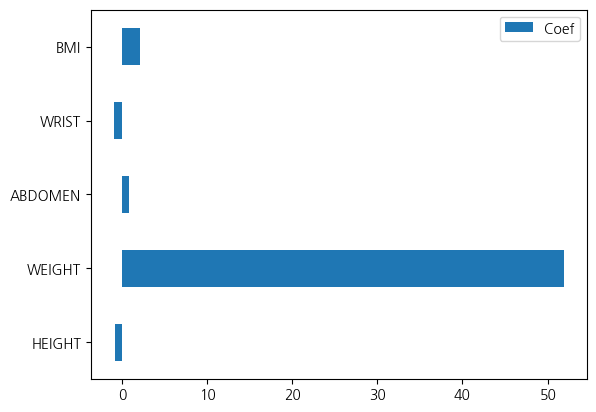

In [29]:
# p.63
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]},
                          index = ["HEIGHT", "WEIGHT", "ABDOMEN", "WRIST", "BMI"])

df_reg_coef.plot.barh(y="Coef")

- 중요도는 회귀계수의 절대값 크기
- WEIGHT 은 커질수록 FAT이 높음
- 표준화 회귀계수를 이용한 변수 중요도 : 회귀계수의 방향은 동일하나 중요도 크기 변함